In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
from anndata import AnnData
from os import mkdir
from os.path import isdir, join

import seaborn as sns
from scipy.stats import kruskal

In [2]:
from shutil import rmtree
rmtree('pbmch1n1_fig')

if not isdir('pbmch1n1_fig'):
    mkdir('pbmch1n1_fig')

In [3]:
def replace(vec):
    for i in range(len(vec)):
        entry = vec[i]
        if entry == 'CD3-1':
            vec[i] = 'CD3'
        if entry == 'CD4-1':
            vec[i] = 'CD4'
            
def replace_index(df):
    vec = list(df.index)
    replace(vec)
    df.index = vec

/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if __name__ == '__main__':
/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used 

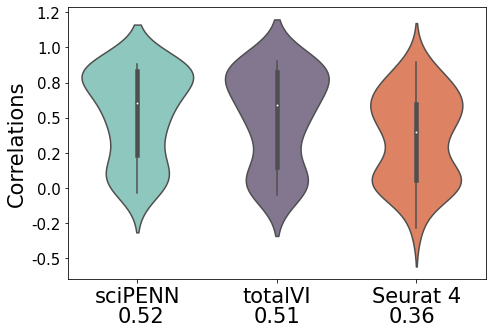

In [4]:
corrs = {'sciPENN': pd.read_csv('corrs_results/scipenn_pbmctoh1n1.csv', index_col = 0), 'totalVI': pd.read_csv('corrs_results/totalvi_pbmctoh1n1.csv', index_col = 0), 'Seurat 4': pd.read_csv('corrs_results/seurat4_pbmctoh1n1.csv', index_col = 0)}
index = list(pd.read_csv('corrs_results/scipenn_pbmctoh1n1.csv', index_col = 0).index)
replace(index)
[replace_index(corrs[key]) for key in corrs]
corrs = {key: corrs[key].loc[index] for key in corrs}

scipen_corrs = corrs['sciPENN'].mean(axis = 1)[:, None]
totalvi_corrs = corrs['totalVI'].mean(axis = 1)[:, None]
seurat4_corrs = corrs['Seurat 4'].mean(axis = 1)[:, None]

q = len(scipen_corrs)

data = pd.DataFrame(np.concatenate((scipen_corrs, totalvi_corrs, seurat4_corrs), axis = 1), columns = corrs.keys())

fig, ax = plt.subplots(1, 1, figsize = (7.5, 5))
sns.violinplot(ax = ax, data = data, palette = ["#83D1C4","#817393","#F17950"])
mean_corrs = [x.mean() for x in [scipen_corrs, totalvi_corrs, seurat4_corrs]]

ax.set_title(f"{mean_corrs[0]:.2f}", loc = 'left', x = 0.12, y = - 0.18, size = 21)
ax.set_title(f"{mean_corrs[1]:.2f}", y = - 0.18, size = 21)
ax.set_title(f"{mean_corrs[2]:.2f}", x = 0.88, y = - 0.18, loc = 'right', size = 21)

ax.set_ylabel('Correlations', size = 21)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 21)
ax.set_yticklabels([round(x, 1) for x in ax.get_yticks()], fontsize = 15)

ax.figure.savefig('pbmch1n1_fig/corrplot.pdf')

In [8]:
corrs['s'].shape

(59, 20)

/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  
/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  import sys
/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: FixedFormatter should only be used together with FixedLoca

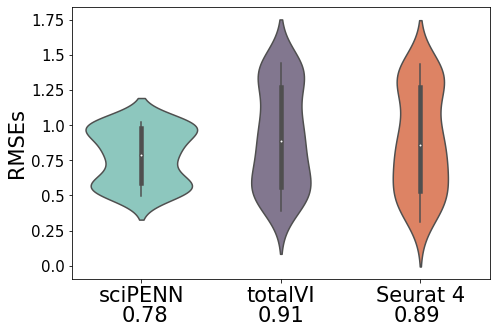

In [5]:
mses = {'sciPENN': pd.read_csv('mse_results/scipenn_pbmctoh1n1.csv', index_col = 0), 'totalVI': pd.read_csv('mse_results/totalvi_pbmctoh1n1.csv', index_col = 0), 'Seurat 4': pd.read_csv('mse_results/seurat4_pbmctoh1n1.csv', index_col = 0)}
[replace_index(mses[key]) for key in mses]
mses = {key: mses[key].loc[index]**(1/2) for key in mses}

scipen_mses = mses['sciPENN'].mean(axis = 1)[:, None]
totalvi_mses = mses['totalVI'].mean(axis = 1)[:, None]
seurat4_mses = mses['Seurat 4'].mean(axis = 1)[:, None]

data = pd.DataFrame(np.concatenate((scipen_mses, totalvi_mses, seurat4_mses), axis = 1), columns = mses.keys())

fig, ax = plt.subplots(1, 1, figsize = (7.5, 5))
sns.violinplot(ax = ax, data = data, palette = ["#83D1C4","#817393","#F17950"])
mean_mses = [x.mean() for x in [scipen_mses, totalvi_mses, seurat4_mses]]

ax.set_title(f"{mean_mses[0]:.2f}", loc = 'left', x = 0.12, y = - 0.18, size = 21)
ax.set_title(f"{mean_mses[1]:.2f}", y = - 0.18, size = 21)
ax.set_title(f"{mean_mses[2]:.2f}", x = 0.88, y = - 0.18, loc = 'right', size = 21)

ax.set_ylabel('RMSEs', size = 21)
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 21)
ax.set_yticklabels(ax.get_yticks(), fontsize = 15)

ax.figure.savefig('pbmch1n1_fig/mseplot.pdf')

In [6]:
scipenn_embedding = sc.read('scipenn_pbmctoh1n1embedding.h5ad')

sc.pp.pca(scipenn_embedding, n_comps = 20)
sc.pp.neighbors(scipenn_embedding, n_pcs = 20)
sc.tl.umap(scipenn_embedding)

batch_map = {cell: 'PBMC' if name[:4] == 'DS-1' else 'H1N1' for cell, name in zip(scipenn_embedding.obs.index, scipenn_embedding.obs['batch'])}

scipenn_embedding = pd.DataFrame(scipenn_embedding.obsm['X_umap'], index = scipenn_embedding.obs.index)
scipenn_embedding['Batch'] = [batch_map[cell] for cell in scipenn_embedding.index]
scipenn_embedding = scipenn_embedding.groupby('Batch')

In [7]:
totalvi_embedding = pd.read_csv('totalvi_pbmctoh1n1embedding.csv', index_col = 0)
idx = totalvi_embedding.index
totalvi_embedding = AnnData(totalvi_embedding)
totalvi_embedding.obs.index = idx 

sc.pp.neighbors(totalvi_embedding, n_pcs = 0, use_rep = None)
sc.tl.umap(totalvi_embedding)

totalvi_embedding = pd.DataFrame(totalvi_embedding.obsm['X_umap'], index = totalvi_embedding.obs.index)
totalvi_embedding['Batch'] = [batch_map[cell] for cell in totalvi_embedding.index]
totalvi_embedding = totalvi_embedding.groupby('Batch')

In [8]:
seurat_trainumap = pd.read_csv("pbmctoh1n1_trainumap.csv", index_col = 0)
seurat_testumap = pd.read_csv("pbmctoh1n1_testumap.csv", index_col = 0)
seurat_testumap.columns = ["UMAP_1", "UMAP_2"]
seurat_umap = pd.concat((seurat_trainumap, seurat_testumap), axis = 0)

seurat_umap['Batch'] = [batch_map[cell] for cell in seurat_umap.index]
seurat_umap = seurat_umap.groupby('Batch')

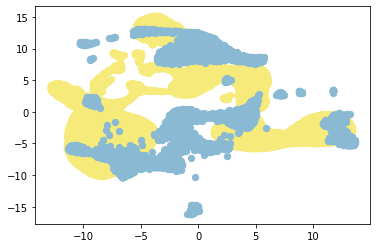

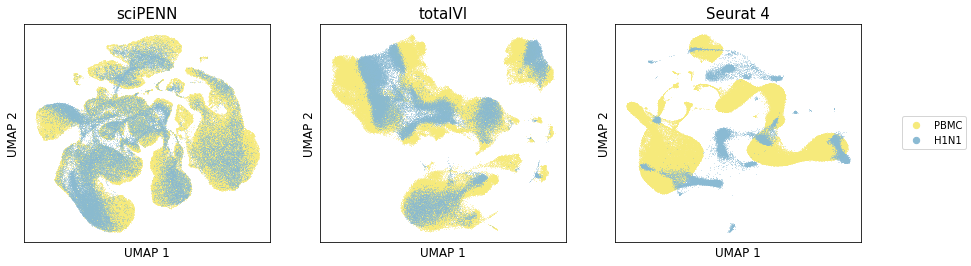

In [9]:
_, ax =  plt.subplots(1)
f, axs = plt.subplots(1, 3, figsize = (15, 4))

names = ['PBMC', 'H1N1']
colormap = {'PBMC': '#F6EA7BFF', 'H1N1': '#8ABAD3FF'}

method_names = ['sciPENN', 'totalVI', 'Seurat 4']

def customize_axes(ax, name):
    ax.set_title(name, size = 15)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel('UMAP 1', size = 12)
    ax.set_ylabel('UMAP 2', size = 12)
    
method_names = ['sciPENN', 'totalVI', 'Seurat 4']
[customize_axes(ax, name) for ax, name in zip(axs, method_names)]

for name in names:
    group = scipenn_embedding.get_group(name)
    axs[0].scatter(group[0], group[1], linewidth = 0, s = 1, marker = '.', label = name, c = colormap[name])
    
    group = totalvi_embedding.get_group(name)
    axs[1].scatter(group[0], group[1], linewidth = 0, s = 1, marker = '.', label = name, c = colormap[name])
    
    group = seurat_umap.get_group(name)
    axs[2].scatter(group['UMAP_1'], group['UMAP_2'], linewidths = 0, s = 1, marker = '.', label = name, c = colormap[name])
    
    ax.scatter(group['UMAP_1'], group['UMAP_2'], label = name, c = colormap[name], s = 40)

Line, Label = ax.get_legend_handles_labels()
f.legend(Line, Label, loc = 'center right')
f.savefig('pbmch1n1_fig/embeddings.png', dpi = 300)

In [10]:
base_path = 'totalVI_quantiles_h1n1'

q10 = pd.read_csv(join(base_path, 'q10.csv'), index_col = 0)
q25 = pd.read_csv(join(base_path, 'q25.csv'), index_col = 0)
q75 = pd.read_csv(join(base_path, 'q75.csv'), index_col = 0)
q90 = pd.read_csv(join(base_path, 'q90.csv'), index_col = 0)

truth = pd.read_csv(join(base_path, 'truth.csv'), index_col = 0)

In [11]:
totalVI_coverage50 = (q75.to_numpy() > truth.to_numpy())*(q25.to_numpy() < truth.to_numpy())
totalVI_coverage50 = totalVI_coverage50.mean(axis = 0)

In [12]:
scipenn = sc.read("scipenn_pbmctoh1n1features.h5ad")

scipenn_coverage50 = (scipenn.layers['q75'] > truth.to_numpy()) * (scipenn.layers['q25'] < truth.to_numpy())
scipenn_coverage50 = scipenn_coverage50.mean(axis = 0)

In [13]:
totalVI_coverage80 = (q90.to_numpy() > truth.to_numpy())*(q10.to_numpy() < truth.to_numpy())
totalVI_coverage80 = totalVI_coverage80.mean(axis = 0)

In [14]:
scipenn_coverage80 = (scipenn.layers['q90'] > truth.to_numpy()) * (scipenn.layers['q10'] < truth.to_numpy())
scipenn_coverage80 = scipenn_coverage80.mean(axis = 0)

In [15]:
data = np.concatenate((totalVI_coverage50, scipenn_coverage50, totalVI_coverage80, scipenn_coverage80))

In [16]:
method = (['totalVI'] * len(totalVI_coverage50) + ['sciPENN'] * len(scipenn_coverage50)) * 2
quantile = ['50% PI'] * (len(totalVI_coverage50) + len(scipenn_coverage50)) + ['80% PI'] * (len(totalVI_coverage50) + len(scipenn_coverage50))

In [17]:
data = {'Coverage': data, 'Method': method, 'Interval': quantile}
df = pd.DataFrame(data)

/home/jlakkis/miniconda3/envs/scipen/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


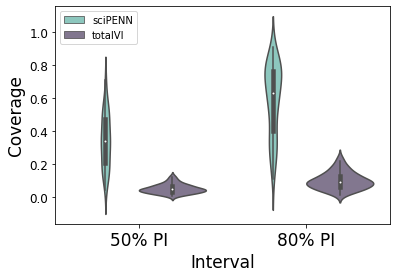

In [18]:
fig, ax = plt.subplots(1, 1)
sns.violinplot(ax = ax, x = "Interval", y = "Coverage", hue = "Method", hue_order = ['sciPENN', 'totalVI'], data = df, palette = ["#83D1C4","#817393"])

Line, Label = ax.get_legend_handles_labels()
ax.legend(Line, Label, loc = 'upper left')
ax.set_xticklabels(ax.get_xticklabels(), fontsize = 17)
ax.set_yticklabels([round(x, 1) for x in ax.get_yticks()], fontsize = 12)
ax.set_xlabel(ax.get_xlabel(), size = 17)
ax.set_ylabel(ax.get_ylabel(), size = 17)

fig.savefig('pbmch1n1_fig/coverageprob.pdf')